# Logistic Regression with Keras

### Dataset 생성

In [1]:
import numpy as np
import matplotlib.pyplot as plt

list 생성 후 연산을 위해 np.array로 만들어 줌

In [2]:
train_x = [[1,1],[1,3],[2,2],[2,4],[3,1],[3,3],[4,2],[4,4],[5,7],[5,9],[6,6],[6,8],[7,7],[7,9],[8,6],[8,8]]
train_y = [[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[1],[1]]

In [3]:
# list를 연산하려 할 때 생기는 오류
# list indices must be integers or slices, not tuple
#plt.scatter(train_x[:,0:1], train_x[:,1:2], c=train_y)

In [4]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In [5]:
train_x

array([[1, 1],
       [1, 3],
       [2, 2],
       [2, 4],
       [3, 1],
       [3, 3],
       [4, 2],
       [4, 4],
       [5, 7],
       [5, 9],
       [6, 6],
       [6, 8],
       [7, 7],
       [7, 9],
       [8, 6],
       [8, 8]])

In [6]:
train_y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

### Dataset 시각화 (산점도)

데이터를 시각화해서 보기 위해 matplotlib.pyplot 모듈의 scatter()함수 (산점도) 사용

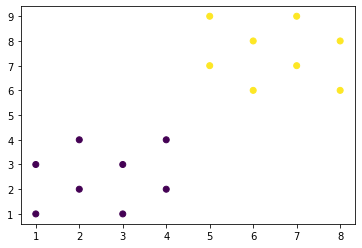

In [7]:
plt.scatter(train_x[:,0:1], train_x[:,1:2], c=train_y)
plt.show()

**scatter(x, y, size =, color =, alpha = , label = )**

train_x의 모든 list의 0번째 array를 x값으로, 1번째 array를 y값으로 사용하여 그래프 생성  
c(color)는 train_y의 그룹에 맞게 같은 그룹끼리 같은 색으로 지정

### Keras를 이용한 Logistic Regression 구현

In [8]:
import tensorflow as tf

In [9]:
print(tf.__version__)

2.3.0


**Keras를 이용한 class 생성**

Keras : tensorflow 확장 라이브러리 중 하나  
 - 순차형(Sequential) 모델 : 계층(layer)을 쌓아 모델링 하도록 설계
 - 함수형 API (Funtional API) : 다양한 계층 구조를 가진 일반적인 모델 지원

In [10]:
class LogisticWithKeras():
    # 초기화(initialize) 메소드 : 객체 생성시 자동으로 호출되는 메소드
    def __init__(self):
        self.epochs = 500
        self.learning_rate = 0.17

    # layer를 기준으로 모델을 정의
    def buildModel(self):
        # 순차형(Sequential) 모델 사용
        self.model = tf.keras.Sequential() 
        
        # 1개의 unit을 가진 Fully-Connected layer층 모델에 추가
        # 활성화 함수는 sigmoid 사용
        self.model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        
        # 확률적 경사 하강법(Stochastic Gradient Descent, SGD) 옵티마이저
        optimizer = tf.keras.optimizers.SGD(self.learning_rate)

        self.model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

    # train_x, train_y를 가지고 model을 학습하는 메소드    
    def fitModel(self, x, y):
        # shuffle 파라미터가 true이면 각 epoch마다 새로운 order를 만들어냄 (데이터셋을 무작위로 섞음)
        self.model.fit(x, y, epochs=self.epochs, batch_size=8, shuffle=True)

    # train_x를 가지고 학습된 model의 결과에 적용해서 label을 도출하는 메소드
    def predictModel(self, x):
        return self.model.predict(x)
    
    # test_x, test_y를 가지고 학습된 model에 적용해서 res_y를 구하고, 이를 test_y와 비교한 정학도를 도출
    def evalModel(self, x, y):
        return self.model.evaluate(x,y)  

**학습에 따른 loss 값 확인**

In [11]:
model = LogisticWithKeras()
model.buildModel()
model.fitModel(train_x, train_y) # train_x와 train_y 데이터로 모델 학습

Epoch 1/500
2/2 [==============================] - 0s 582us/step - loss: 0.8833 - binary_accuracy: 0.5000
Epoch 2/500
2/2 [==============================] - 0s 395us/step - loss: 0.6447 - binary_accuracy: 0.5625
Epoch 3/500
2/2 [==============================] - 0s 466us/step - loss: 0.6083 - binary_accuracy: 0.5625
Epoch 4/500
2/2 [==============================] - 0s 464us/step - loss: 0.5656 - binary_accuracy: 0.6875
Epoch 5/500
2/2 [==============================] - 0s 479us/step - loss: 0.5525 - binary_accuracy: 0.6875
Epoch 6/500
2/2 [==============================] - 0s 354us/step - loss: 0.5488 - binary_accuracy: 0.6875
Epoch 7/500
2/2 [==============================] - 0s 388us/step - loss: 0.5270 - binary_accuracy: 0.8125
Epoch 8/500
2/2 [==============================] - 0s 318us/step - loss: 0.5188 - binary_accuracy: 0.6875
Epoch 9/500
2/2 [==============================] - 0s 304us/step - loss: 0.6016 - binary_accuracy: 0.6875
Epoch 10/500
2/2 [============================

**train_x를 model에 적용하여 결과 확인**

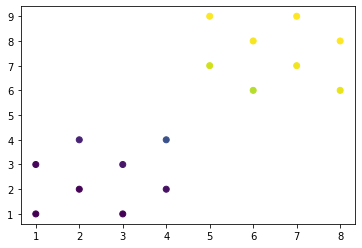

In [12]:
res_y = model.predictModel(train_x)
plt.scatter(train_x[:,0:1], train_x[:,1:2], c=res_y)
plt.show()

In [13]:
for i in range(0, train_x.shape[0]):
    print(train_x[i], res_y[i], "-", train_y[i])

[1 1] [0.00300425] - [0]
[1 3] [0.02208179] - [0]
[2 2] [0.01424909] - [0]
[2 4] [0.0977338] - [0]
[3 1] [0.00916871] - [0]
[3 3] [0.06484592] - [0]
[4 2] [0.04250357] - [0]
[4 4] [0.24961135] - [0]
[5 7] [0.9228256] - [1]
[5 9] [0.9889631] - [1]
[6 6] [0.8844576] - [1]
[6 8] [0.9828656] - [1]
[7 7] [0.9734895] - [1]
[7 9] [0.996379] - [1]
[8 6] [0.95919585] - [1]
[8 8] [0.99435514] - [1]


train_x를 model에 적용한 결과 res_y의 label은   
train_y에서 label 0이었던 값들은 0에 가깝게,
train_y에서 label이 1이었던 값들은 1에 가까운 값이 나옴

**정확도 결과**

In [14]:
test_x = [[2,3],[3,2],[6,9],[7,8],[8,7]]
test_y = [[0],[0],[1],[1],[1]]

In [15]:
test_x = np.array(test_x, dtype=np.float32)
test_y = np.array(test_y, dtype=np.float32)

In [16]:
print(model.evalModel(test_x, test_y))

1/1 [==============================] - 0s 463us/step - loss: 0.0191 - binary_accuracy: 1.0000
[0.019098099321126938, 1.0]


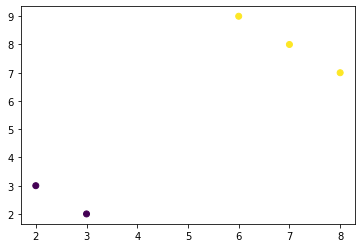

In [17]:
plt.scatter(test_x[:,0:1], test_x[:,1:2], c=test_y)
plt.show()

* accuracy가 1.0으로 완벽하게 학습  
* test 데이터에 대해서도 정확하게 판단

### References
* https://ayoteralab.tistory.com/entry/Logistic-Regression-Tutorial-with-Numpy-Tensorflow-Keras  
* https://excelsior-cjh.tistory.com/159